In [126]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import matplotlib.cm as cm           # import colormap stuff
from mpl_toolkits import mplot3d
import pandas as pd
import copy
import warnings
warnings.filterwarnings("ignore")

# A. Linear SVM for two-class problem

## Load dataset

In [157]:
data = sio.loadmat('hw3_dataset1')
X = data['X']
Y = data['y']

## Visualize dataset

Text(0.5, 1.0, 'Samples of dataset1')

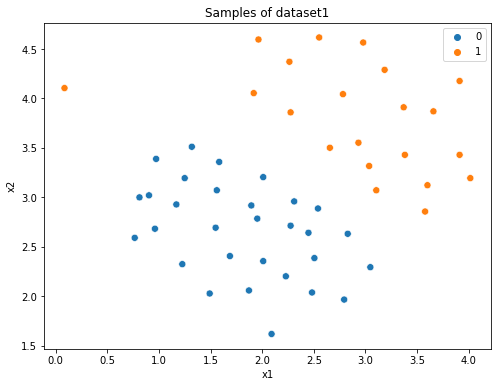

In [158]:
def plot_data(X, Y):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y[:, 0], s=50)
    plt.xlabel('x1')
    plt.ylabel('x2')

plot_data(X, Y)
plt.title('Samples of dataset1')

## Linear SVM

In [159]:
C = [0.1, 1, 10, 100]
clf = []

for c in C:
    svm_model = svm.SVC(C = c, kernel='linear', random_state=0)
    svm_model.fit(X, Y)
    clf.append(svm_model)

In [180]:
## Reference to 
## https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

def plot_svc_decision_function(model, ax=None, plot_support=True, plot_margin=True, label=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    if plot_margin:
        ax.contour(X, Y, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
    else:
        ax.contour(X, Y, P, colors='k',
                   levels=[0], alpha=0.5,
                   linestyles=['-'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Text(0.5, 1.0, 'Linear SVM, C = 0.1')

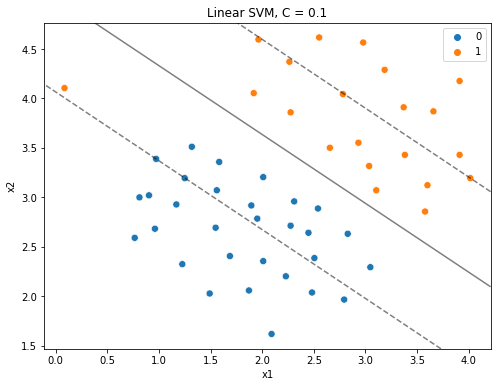

In [181]:
plot_data(X, Y)
plot_svc_decision_function(clf[0])
plt.title('Linear SVM, C = 0.1')

Text(0.5, 1.0, 'Linear SVM, C = 1')

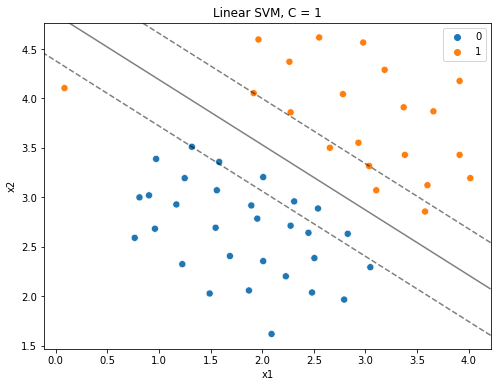

In [174]:
plot_data(X, Y)
plot_svc_decision_function(clf[1])
plt.title('Linear SVM, C = 1')

Text(0.5, 1.0, 'Linear SVM, C = 10')

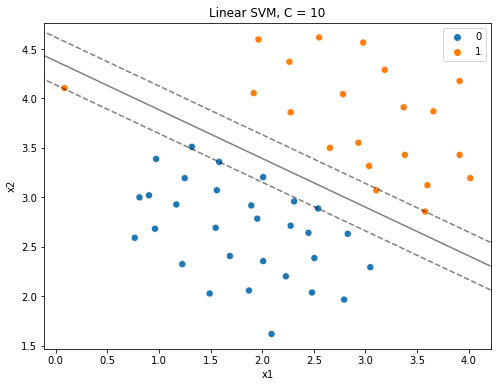

In [175]:
plot_data(X, Y)
plot_svc_decision_function(clf[2])
plt.title('Linear SVM, C = 10')

Text(0.5, 1.0, 'Linear SVM, C = 100')

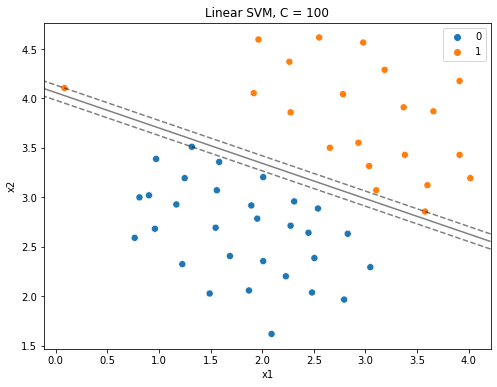

In [176]:
plot_data(X, Y)
plot_svc_decision_function(clf[3])
plt.title('Linear SVM, C = 100')

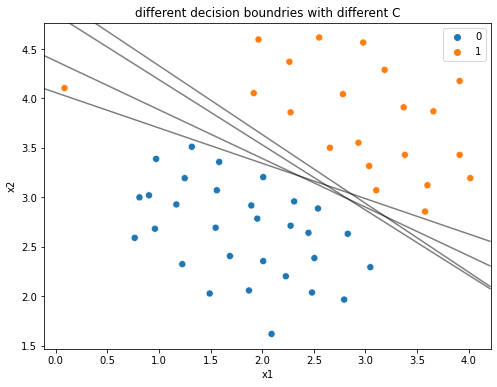

In [177]:
plot_data(X, Y)
plot_svc_decision_function(clf[0], plot_margin=False, label='c=0.1')
plot_svc_decision_function(clf[1], plot_margin=False, label='c=1')
plot_svc_decision_function(clf[2], plot_margin=False, label='c=10')
plot_svc_decision_function(clf[3], plot_margin=False, label='c=100')
plt.title('different decision boundries with different C')
plt.legend()

## Plot Training accuracy - C

In [12]:
acc = [c.score(X, Y) for c in clf]   # training accuracy
acc

[0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 1.0]

Text(0, 0.5, 'training accuracy')

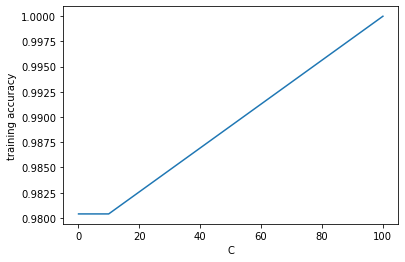

In [13]:
plt.plot(C, acc)
plt.xlabel('C')
plt.ylabel('training accuracy')

# B. Kernel SVM for two-class problem

## Load and Visualize dataset

In [14]:
data = sio.loadmat('hw3_dataset2')
X = data['X']
Y = data['y']

Text(0.5, 1.0, 'Samples of dataset2')

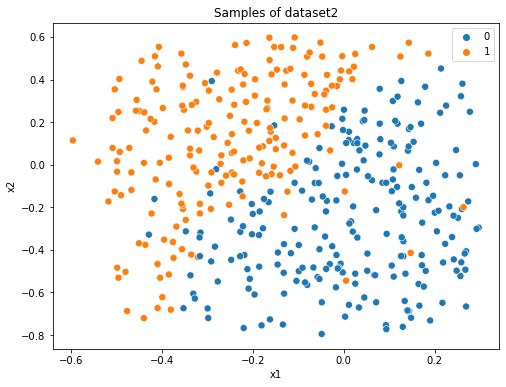

In [15]:
plot_data(X, Y)
plt.title('Samples of dataset2')

## SVM with Gaussian Kernel

In [16]:
sigma = [0.01, 0.04, 0.1, 0.4, 1, 4, 10, 40]
C = [0.01, 0.04, 0.1, 0.4, 1, 4, 10, 40]

In [17]:
test_acc = []
train_acc = []
test_var = []
train_var = []

for sig in sigma:
    for c in C:
        # cross-validation
        cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
        # create model
        svm_model = svm.SVC(C=c, kernel='rbf', gamma=sig)
#             score = cross_val_score(svm_model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
        results = cross_validate(estimator=svm_model, X=X, y=Y, cv=cv, scoring='accuracy', return_train_score=True)
        test_acc.append(results['test_score'].mean())
        train_acc.append(results['train_score'].mean())
        test_var.append(np.var(results['test_score']))
        train_var.append(np.var(results['train_score']))

print(test_acc)
print(train_acc)
print(test_var)
print(train_var)

[0.5304936120789779, 0.5304936120789779, 0.5304936120789779, 0.5304936120789779, 0.7867073170731708, 0.866678281068525, 0.9002380952380952, 0.919959349593496, 0.5304936120789779, 0.5304936120789779, 0.5304936120789779, 0.8275087108013939, 0.8664401858304298, 0.9065795586527295, 0.9204471544715449, 0.9248315911730546, 0.5304936120789779, 0.5304936120789779, 0.7670092915214868, 0.8640069686411151, 0.9004819976771197, 0.9211730545876889, 0.9245760743321719, 0.9306620209059234, 0.5304936120789779, 0.8243379790940767, 0.8571951219512198, 0.9043786295005808, 0.924076655052265, 0.9262659698025553, 0.9333217189314751, 0.9333449477351917, 0.5395005807200929, 0.8442915214866435, 0.884425087108014, 0.9214285714285715, 0.9299245063879211, 0.932595818815331, 0.9352845528455285, 0.9311556329849013, 0.7840476190476187, 0.8846631823461092, 0.9075609756097562, 0.9323577235772359, 0.9372241579558653, 0.940383275261324, 0.9459872241579558, 0.942828106852497, 0.6244599303135888, 0.9080487804878051, 0.9194

In [18]:
# for future runs
test_acc = [0.5304936120789779, 0.5304936120789779, 0.5304936120789779, 0.5304936120789779, 0.7867073170731708, 0.866678281068525, 0.9002380952380952, 0.919959349593496, 0.5304936120789779, 0.5304936120789779, 0.5304936120789779, 0.8275087108013939, 0.8664401858304298, 0.9065795586527295, 0.9204471544715449, 0.9248315911730546, 0.5304936120789779, 0.5304936120789779, 0.7670092915214868, 0.8640069686411151, 0.9004819976771197, 0.9211730545876889, 0.9245760743321719, 0.9306620209059234, 0.5304936120789779, 0.8243379790940767, 0.8571951219512198, 0.9043786295005808, 0.924076655052265, 0.9262659698025553, 0.9333217189314751, 0.9333449477351917, 0.5395005807200929, 0.8442915214866435, 0.884425087108014, 0.9214285714285715, 0.9299245063879211, 0.932595818815331, 0.9352845528455285, 0.9311556329849013, 0.7840476190476187, 0.8846631823461092, 0.9075609756097562, 0.9323577235772359, 0.9372241579558653, 0.940383275261324, 0.9459872241579558, 0.942828106852497, 0.6244599303135888, 0.9080487804878051, 0.9194541231126598, 0.9357781649245064, 0.9367479674796748, 0.940150987224158, 0.9413646922183508, 0.9348025551684088, 0.5304936120789779, 0.8876480836236932, 0.9365040650406504, 0.9338443670150985, 0.9331126596980256, 0.9328629500580721, 0.9311498257839722, 0.9323635307781649]
train_acc = [0.5304146341463415, 0.5304146341463415, 0.5304146341463415, 0.5304146341463415, 0.8003471032007617, 0.8716939134256206, 0.9049743646085112, 0.9255745257452572, 0.5304146341463415, 0.5304146341463415, 0.5304146341463415, 0.8329559071266387, 0.870828755584853, 0.9126784589467518, 0.9255745257452574, 0.9261151395297738, 0.5304146341463415, 0.5304146341463415, 0.7849629385483042, 0.8697205009887938, 0.9047037281183623, 0.9266290192631655, 0.9285214971068629, 0.9346041163114333, 0.5304146341463415, 0.8319277814399767, 0.8607191825972313, 0.9086778729949461, 0.9289267560243171, 0.93089972899729, 0.936982934153666, 0.9381182157767525, 0.5407675236211822, 0.8472556214751337, 0.8887803413169267, 0.9260612319636711, 0.9315490368417197, 0.9371453892917309, 0.9395239141580605, 0.9391458287555849, 0.7926436680583023, 0.8916192045704241, 0.9150848897678165, 0.9378204057716253, 0.9424166117336852, 0.9494996704021094, 0.9530953636563393, 0.9508787079762687, 0.6389800043946385, 0.9174374130227788, 0.9303052808906468, 0.9476610268805391, 0.9509326887863473, 0.9500949974364606, 0.9485536512121878, 0.947310334724969, 0.5304146341463415, 0.8996481359408189, 0.9483369222881417, 0.9486616860763203, 0.9499323225664688, 0.9536903244708124, 0.9573399985351206, 0.9569340071779096]
test_var = [0.0061804433909197235, 0.0061804433909197235, 0.0061804433909197235, 0.0061804433909197235, 0.00498204755429834, 0.0034901289724694157, 0.002121896553584749, 0.002264039835644747, 0.0061804433909197235, 0.0061804433909197235, 0.0061804433909197235, 0.0036304816334624284, 0.0034419131186085384, 0.0020874806932489423, 0.0023061972816094496, 0.0018233485898821145, 0.0061804433909197235, 0.0061804433909197235, 0.007596063614817333, 0.003445864746850554, 0.0021764502489474867, 0.002086279897642181, 0.00198062162005393, 0.001493610730034626, 0.0061804433909197235, 0.003652031272552646, 0.0033119329885434234, 0.0020130160888468013, 0.0018029950588206714, 0.0017827395622139386, 0.0014391631965100127, 0.0014836931639600106, 0.008271288551113486, 0.00354535117041066, 0.002461956291539023, 0.0018656594107006267, 0.0016831241459502688, 0.0012761155761134505, 0.001384368714767286, 0.0014198867629542388, 0.0068522519596773855, 0.0025666944211751724, 0.0023359541952811262, 0.0016621307099083926, 0.0013239912264727412, 0.001117088413791056, 0.0009040179288054691, 0.001138348805713044, 0.010831501333430457, 0.0024259006557213404, 0.00177404592612377, 0.0011281758846707422, 0.0010373622223031577, 0.0009480361408890334, 0.0010759539727054803, 0.0013277706621018417, 0.0061804433909197235, 0.003085919965844756, 0.0015358948417756944, 0.0011189058451062351, 0.0011589404589914482, 0.0012642559363622498, 0.0015020909970174857, 0.0013696728879931896]
train_var = [7.64721509296489e-05, 7.64721509296489e-05, 7.64721509296489e-05, 7.64721509296489e-05, 0.0007788658334739284, 6.0021030570151506e-05, 7.255865323979534e-05, 3.5127756763521556e-05, 7.64721509296489e-05, 7.64721509296489e-05, 7.64721509296489e-05, 7.807719875874833e-05, 6.050837818433798e-05, 8.848100314515633e-05, 2.7386464549773613e-05, 3.479419362875691e-05, 7.64721509296489e-05, 7.64721509296489e-05, 0.0013359619605295928, 6.106350608906471e-05, 8.065476391172698e-05, 2.628020158042504e-05, 2.3541396941957504e-05, 3.2379406326166896e-05, 7.64721509296489e-05, 5.974257776273941e-05, 4.933939357088913e-05, 7.874628469222527e-05, 3.658450659823184e-05, 2.0431014182717102e-05, 3.182665285561999e-05, 1.652709306891989e-05, 0.00021861430701995883, 6.730516518522916e-05, 5.112565055261114e-05, 5.089568028404312e-05, 2.5579039705010418e-05, 4.0372716098147664e-05, 1.6946696791919807e-05, 1.7164049140060877e-05, 0.0012177896902857057, 6.364615533852523e-05, 2.9889658264467323e-05, 2.9910864157724985e-05, 1.9251062908066745e-05, 2.1201008925706256e-05, 1.804344219669182e-05, 2.0169286290862405e-05, 0.001598811899154167, 2.9840217840555455e-05, 4.14792701389375e-05, 2.351995302857881e-05, 2.490464452479772e-05, 2.1654712528822202e-05, 1.6295653666646912e-05, 2.1820584812454683e-05, 7.64721509296489e-05, 0.0002686482055475416, 2.13834366117381e-05, 2.3907647570718125e-05, 2.084590780253489e-05, 2.1278861724778213e-05, 1.9946940906317325e-05, 2.1104464326270307e-05]

## 3D plots

In [19]:
# preparation for 3D plot

sigma = [0.01, 0.04, 0.1, 0.4, 1, 4, 10, 40]
sigma = [[s]*8 for s in sigma]
sigma = np.reshape(sigma, (64,))

C = [0.01, 0.04, 0.1, 0.4, 1, 4, 10, 40]
C = np.reshape(C*8, (64,))

In [25]:
def threeD_plot(z, zlabel, title):
    plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')

    cmap = cm.get_cmap('jet') # Get desired colormap
    max_acc = np.max(z)   # get range of colorbars so we can normalize
    min_acc = np.min(z)
    # scale to [0,1], and get their rgb values
    rgba = [cmap((k-min_acc)/max_acc) for k in z] 

    ax.bar3d(C, sigma, np.zeros_like(z), 1, 1, z, color=rgba)

    # Set axes label
    ax.set_xlabel('C', labelpad=10)
    ax.set_ylabel('sigma', labelpad=10)
    ax.set_zlabel(zlabel, labelpad=10)
    
    plt.title(title)
    plt.show()

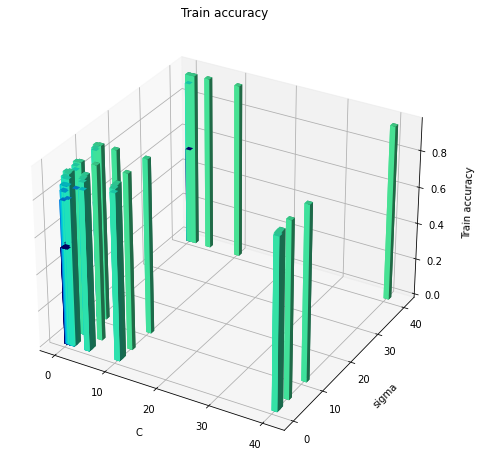

In [26]:
threeD_plot(train_acc, 'Train accuracy', 'Train accuracy')

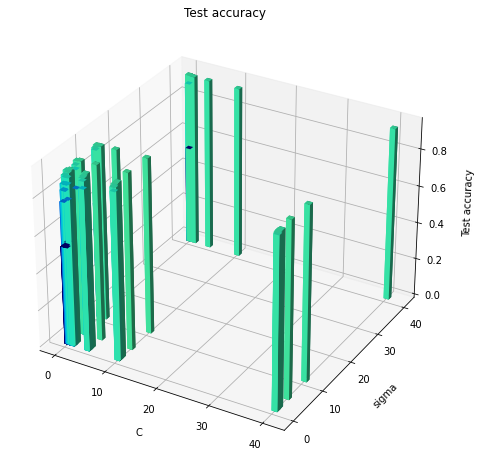

In [27]:
threeD_plot(test_acc, 'Test accuracy', 'Test accuracy')

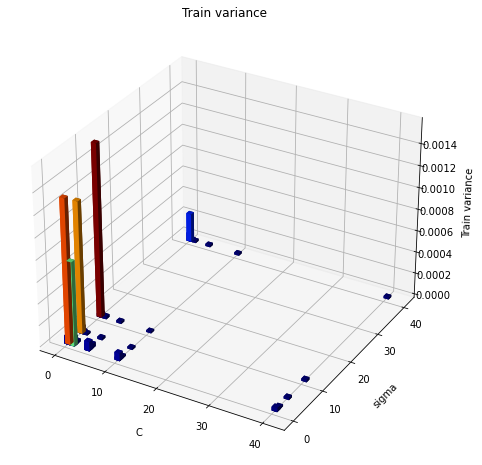

In [28]:
threeD_plot(train_var, 'Train variance', 'Train variance')

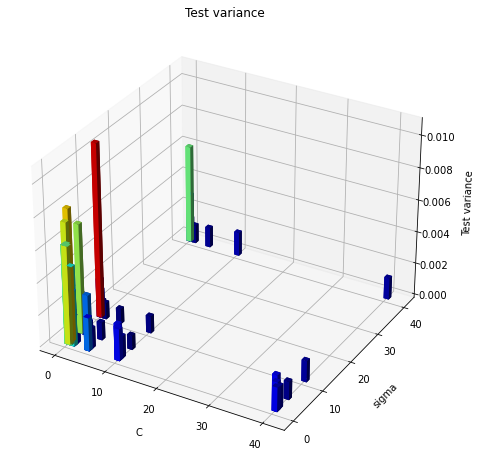

In [29]:
threeD_plot(test_var, 'Test variance', 'Test variance')

## Best value for C and sigma

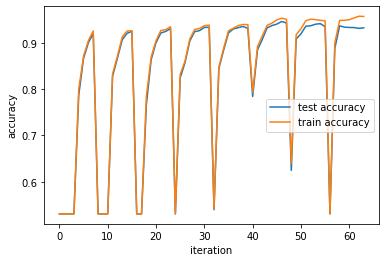

In [30]:
iteration = [i for i in range(0, 64)]
plt.plot(iteration, test_acc, label='test accuracy')
plt.plot(iteration, train_acc, label='train accuracy')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.legend()

In [31]:
print(max(test_acc))
print(np.argmax(test_acc))

0.9459872241579558
46


In [32]:
print(max(train_acc))
print(np.argmax(train_acc))

0.9573399985351206
62


### 47th iteration give us the best result (maximum test accuracy and high train accuracy). 
### Therefore, the best value for C and sigma is 10 , 4

In [33]:
clf = svm.SVC(C=10, kernel='rbf', gamma=4)
clf.fit(X, Y)

SVC(C=10, gamma=4)

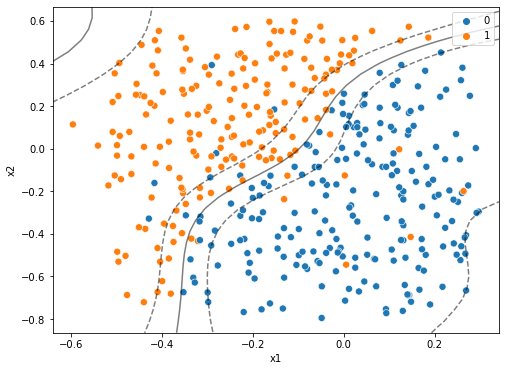

In [34]:
plot_data(X, Y)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

# C. Kernel SVM for multi-class problem

## Load and prepare data

In [131]:
data = pd.read_csv('vehicle.txt', sep=" ", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,91,44,66,151,63,7,137,48,18,146,166,280,167,72,1,9,188,194,2,NaN
1,104,55,109,230,67,12,218,30,24,174,230,706,226,67,8,22,191,202,3,NaN
2,105,50,93,173,54,4,222,30,25,159,254,735,206,83,4,12,186,184,0,NaN
3,107,56,105,202,61,11,221,30,25,179,234,725,212,72,15,1,189,196,3,NaN
4,82,40,73,141,57,8,153,44,19,133,173,342,153,75,11,9,181,187,3,NaN


In [132]:
del data[19]
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,91,44,66,151,63,7,137,48,18,146,166,280,167,72,1,9,188,194,2
1,104,55,109,230,67,12,218,30,24,174,230,706,226,67,8,22,191,202,3
2,105,50,93,173,54,4,222,30,25,159,254,735,206,83,4,12,186,184,0
3,107,56,105,202,61,11,221,30,25,179,234,725,212,72,15,1,189,196,3
4,82,40,73,141,57,8,153,44,19,133,173,342,153,75,11,9,181,187,3


In [133]:
# use this copy for plotting original data samples from that
dataset = copy.deepcopy(data)
dataset.rename(columns = {18:'label'}, inplace = True)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,label
0,91,44,66,151,63,7,137,48,18,146,166,280,167,72,1,9,188,194,2
1,104,55,109,230,67,12,218,30,24,174,230,706,226,67,8,22,191,202,3
2,105,50,93,173,54,4,222,30,25,159,254,735,206,83,4,12,186,184,0
3,107,56,105,202,61,11,221,30,25,179,234,725,212,72,15,1,189,196,3
4,82,40,73,141,57,8,153,44,19,133,173,342,153,75,11,9,181,187,3


In [134]:
Y = data[18]
Y

0      2
1      3
2      0
3      3
4      3
      ..
841    0
842    0
843    3
844    1
845    2
Name: 18, Length: 846, dtype: int64

In [135]:
del data[18]
X = data
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,91,44,66,151,63,7,137,48,18,146,166,280,167,72,1,9,188,194
1,104,55,109,230,67,12,218,30,24,174,230,706,226,67,8,22,191,202
2,105,50,93,173,54,4,222,30,25,159,254,735,206,83,4,12,186,184
3,107,56,105,202,61,11,221,30,25,179,234,725,212,72,15,1,189,196
4,82,40,73,141,57,8,153,44,19,133,173,342,153,75,11,9,181,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,82,43,71,154,68,7,150,45,19,143,171,330,173,78,7,11,181,186
842,78,43,70,147,65,8,147,46,19,145,169,319,168,77,1,12,181,186
843,96,54,104,175,58,10,215,31,24,175,221,682,222,75,13,23,186,194
844,105,51,108,201,62,11,220,30,25,163,232,711,202,72,12,16,189,200


## SVM with Gaussian Kernel

In [136]:
sigma = [0.01, 0.04, 0.1, 0.4, 1, 4, 10, 40]
C = [0.01, 0.04, 0.1, 0.4, 1, 4, 10, 40]

In [41]:
test_acc = []
train_acc = []
test_var = []
train_var = []

for sig in sigma:
    for c in C:
        # create one-vs-one svm model
        svm_model = svm.SVC(C=c, kernel='rbf', gamma=sig, decision_function_shape='ovo')
        # cross-validation
        cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
        results = cross_validate(estimator=svm_model, X=X, y=Y, cv=cv, scoring='accuracy', return_train_score=True)
        test_acc.append(results['test_score'].mean())
        train_acc.append(results['train_score'].mean())
        test_var.append(np.var(results['test_score']))
        train_var.append(np.var(results['train_score']))

print(test_acc)
print(train_acc)
print(test_var)
print(train_var)

[0.2201974789915966, 0.2201974789915966, 0.2201974789915966, 0.2778921568627451, 0.485656862745098, 0.5167492997198879, 0.5167492997198879, 0.5167492997198879, 0.21783333333333332, 0.21783333333333332, 0.21783333333333332, 0.21783333333333332, 0.2627619047619048, 0.27540896358543415, 0.27540896358543415, 0.27540896358543415, 0.21747899159663864, 0.21747899159663864, 0.21747899159663864, 0.21747899159663864, 0.22551820728291314, 0.22800280112044813, 0.22800280112044813, 0.22800280112044813, 0.21747899159663864, 0.21747899159663864, 0.21747899159663864, 0.21747899159663864, 0.21960644257703077, 0.22019747899159658, 0.22019747899159658, 0.22019747899159658, 0.21712324929971985, 0.21712324929971985, 0.21712324929971985, 0.21712324929971985, 0.21759663865546217, 0.2187773109243697, 0.2187773109243697, 0.2187773109243697, 0.22624229691876746, 0.22624229691876746, 0.22624229691876746, 0.22624229691876746, 0.22624229691876746, 0.22624229691876746, 0.22624229691876746, 0.22624229691876746, 0.21

In [137]:
# for future runs
test_acc = [0.2201974789915966, 0.2201974789915966, 0.2201974789915966, 0.2778921568627451, 0.485656862745098, 0.5167492997198879, 0.5167492997198879, 0.5167492997198879, 0.21783333333333332, 0.21783333333333332, 0.21783333333333332, 0.21783333333333332, 0.2627619047619048, 0.27540896358543415, 0.27540896358543415, 0.27540896358543415, 0.21747899159663864, 0.21747899159663864, 0.21747899159663864, 0.21747899159663864, 0.22551820728291314, 0.22800280112044813, 0.22800280112044813, 0.22800280112044813, 0.21747899159663864, 0.21747899159663864, 0.21747899159663864, 0.21747899159663864, 0.21960644257703077, 0.22019747899159658, 0.22019747899159658, 0.22019747899159658, 0.21712324929971985, 0.21712324929971985, 0.21712324929971985, 0.21712324929971985, 0.21759663865546217, 0.2187773109243697, 0.2187773109243697, 0.2187773109243697, 0.22624229691876746, 0.22624229691876746, 0.22624229691876746, 0.22624229691876746, 0.22624229691876746, 0.22624229691876746, 0.22624229691876746, 0.22624229691876746, 0.21925350140056019, 0.21925350140056019, 0.21925350140056019, 0.21925350140056019, 0.21925350140056019, 0.21925350140056019, 0.21925350140056019, 0.21925350140056019, 0.2173613445378151, 0.2173613445378151, 0.2173613445378151, 0.2173613445378151, 0.2173613445378151, 0.2173613445378151, 0.2173613445378151, 0.2173613445378151]
train_acc = [0.2673466153458807, 0.2673466153458807, 0.26735975595034855, 0.4101419944057584, 1.0, 1.0, 1.0, 1.0, 0.2889721357103687, 0.2889721357103687, 0.2889721357103687, 0.29229479445818285, 1.0, 1.0, 1.0, 1.0, 0.2889721357103687, 0.2889721357103687, 0.2889721357103687, 0.29109980996133694, 1.0, 1.0, 1.0, 1.0, 0.2889721357103687, 0.2889721357103687, 0.2889721357103687, 0.2889721357103687, 1.0, 1.0, 1.0, 1.0, 0.2889721357103687, 0.2889721357103687, 0.2889721357103687, 0.2889721357103687, 1.0, 1.0, 1.0, 1.0, 0.2889721357103687, 0.2889721357103687, 0.2889721357103687, 0.2889721357103687, 1.0, 1.0, 1.0, 1.0, 0.2889721357103687, 0.2889721357103687, 0.2889721357103687, 0.2889721357103687, 1.0, 1.0, 1.0, 1.0, 0.2889721357103687, 0.2889721357103687, 0.2889721357103687, 0.2889721357103687, 1.0, 1.0, 1.0, 1.0]
test_var = [0.0013635400415067988, 0.0013635400415067988, 0.0013635400415067988, 0.0019334641209424943, 0.00284111256071056, 0.0024631103794458963, 0.0024631103794458963, 0.0024631103794458963, 0.0011281230354887055, 0.0011281230354887055, 0.0011281230354887055, 0.0011281230354887055, 0.0026948313756875297, 0.0029334585520482703, 0.0029334585520482703, 0.0029334585520482703, 0.001122042542507199, 0.001122042542507199, 0.001122042542507199, 0.001122042542507199, 0.001266221390516991, 0.0013088395436606016, 0.0013088395436606016, 0.0013088395436606016, 0.001122042542507199, 0.001122042542507199, 0.001122042542507199, 0.001122042542507199, 0.0011249203583394143, 0.0011427995884628363, 0.0011427995884628363, 0.0011427995884628363, 0.0011318341532691508, 0.0011318341532691508, 0.0011318341532691508, 0.0011318341532691508, 0.0011331409112664676, 0.0011673325232053609, 0.0011673325232053609, 0.0011673325232053609, 0.0021520924663983245, 0.0021520924663983245, 0.0021520924663983245, 0.0021520924663983245, 0.0021520924663983245, 0.0021520924663983245, 0.0021520924663983245, 0.0021520924663983245, 0.0012520723799323652, 0.0012520723799323652, 0.0012520723799323652, 0.0012520723799323652, 0.0012520723799323652, 0.0012520723799323652, 0.0012520723799323652, 0.0012520723799323652, 0.001124757322536858, 0.001124757322536858, 0.001124757322536858, 0.001124757322536858, 0.001124757322536858, 0.001124757322536858, 0.001124757322536858, 0.001124757322536858]
train_var = [0.0007569736169990912, 0.0007569736169990912, 0.0007568370039500662, 0.0038132339271786057, 0.0, 0.0, 0.0, 0.0, 0.006472420592571723, 0.006472420592571723, 0.006472420592571723, 0.006409178229561727, 0.0, 0.0, 0.0, 0.0, 0.006472420592571723, 0.006472420592571723, 0.006472420592571723, 0.006461840597130401, 0.0, 0.0, 0.0, 0.0, 0.006472420592571723, 0.006472420592571723, 0.006472420592571723, 0.006472420592571723, 0.0, 0.0, 0.0, 0.0, 0.006472420592571723, 0.006472420592571723, 0.006472420592571723, 0.006472420592571723, 0.0, 0.0, 0.0, 0.0, 0.006472420592571723, 0.006472420592571723, 0.006472420592571723, 0.006472420592571723, 0.0, 0.0, 0.0, 0.0, 0.006472420592571723, 0.006472420592571723, 0.006472420592571723, 0.006472420592571723, 0.0, 0.0, 0.0, 0.0, 0.006472420592571723, 0.006472420592571723, 0.006472420592571723, 0.006472420592571723, 0.0, 0.0, 0.0, 0.0]

## 3D plots

In [138]:
# preparation for 3D plot

sigma = [0.01, 0.04, 0.1, 0.4, 1, 4, 10, 40]
sigma = [[s]*8 for s in sigma]
sigma = np.reshape(sigma, (64,))

C = [0.01, 0.04, 0.1, 0.4, 1, 4, 10, 40]
C = np.reshape(C*8, (64,))

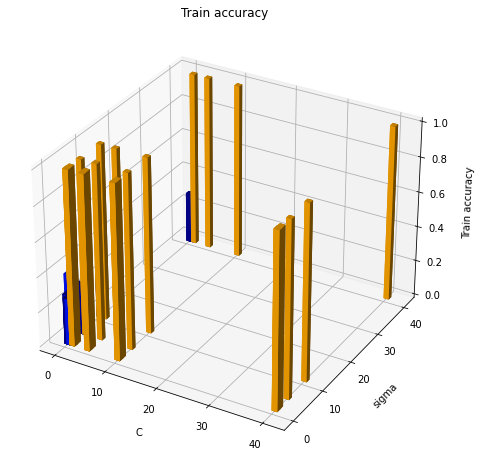

In [139]:
threeD_plot(train_acc, 'Train accuracy', 'Train accuracy')

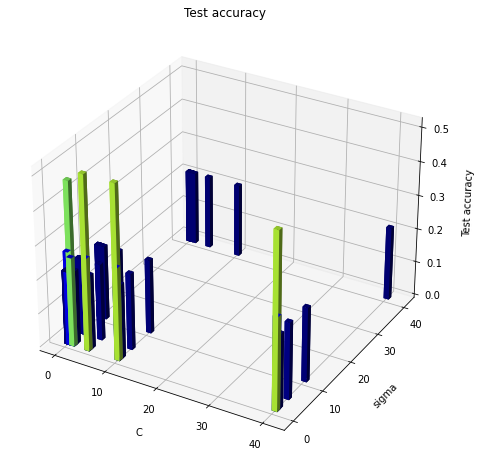

In [140]:
threeD_plot(test_acc, 'Test accuracy', 'Test accuracy')

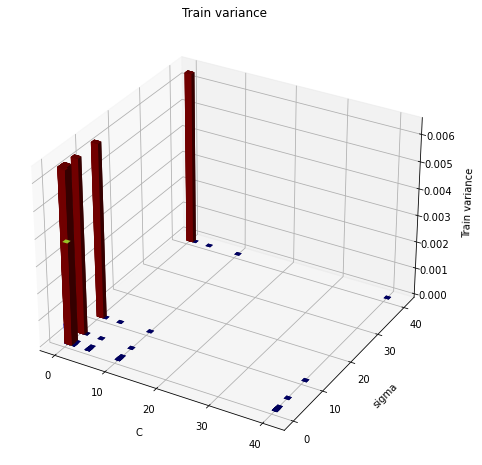

In [141]:
threeD_plot(train_var, 'Train variance', 'Train variance')

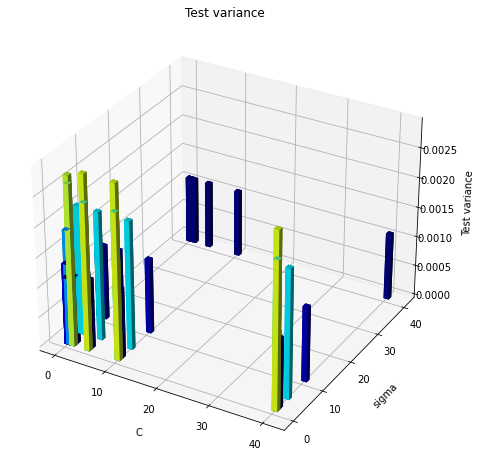

In [142]:
threeD_plot(test_var, 'Test variance', 'Test variance')

## Best value for C and sigma

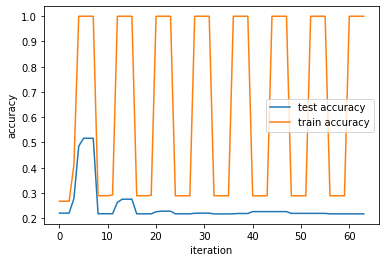

In [143]:
iteration = [i for i in range(0, 64)]
plt.plot(iteration, test_acc, label='test accuracy')
plt.plot(iteration, train_acc, label='train accuracy')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.legend()

In [144]:
print(max(test_acc))
print(np.argmax(test_acc))

0.5167492997198879
5


In [145]:
print(max(train_acc))
print(np.argmax(train_acc))

1.0
4


### 6th iteration give us the best result (maximum test accuracy and high train accuracy). 
### Therefore, the best value for C and sigma is 4 , 0.01

In [146]:
clf = svm.SVC(C=4, kernel='rbf', gamma=0.01)
clf.fit(X, Y)

SVC(C=4, gamma=0.01)

In [147]:
# plot multi-dimension data in 2D space
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=19, n_iter=300)
tsne_results = tsne.fit_transform(dataset)

dataset['tsne-2d-one'] = tsne_results[:,0]
dataset['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 58 nearest neighbors...
[t-SNE] Indexed 846 samples in 0.000s...
[t-SNE] Computed neighbors for 846 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 846 / 846
[t-SNE] Mean sigma: 14.866964
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.306362
[t-SNE] KL divergence after 300 iterations: 0.769673


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

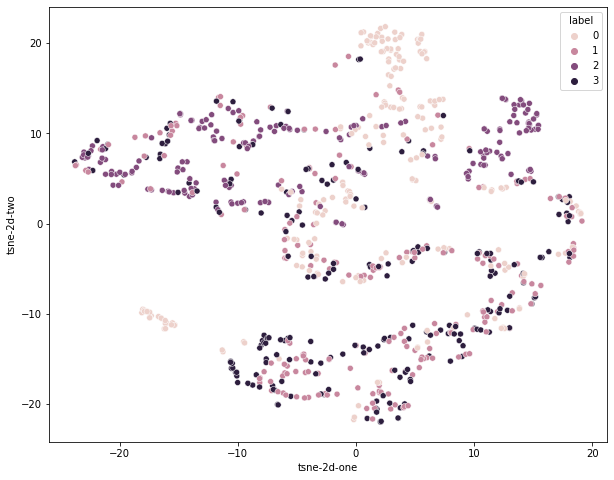

In [156]:
# plot data samples
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    data=dataset,
    legend="full"
)


# plot_svc_decision_function(clf)
# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')